# DeepSets with MLPs

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
results = pd.read_csv("deepsets-mlp-varied-max-val.csv")
results[["train_max_value", "valid_max_value", "test_max_value", "epochs", "random_seed", "avg_test_loss"]].sort_values(by="random_seed")

,train_max_value,valid_max_value,test_max_value,epochs,random_seed,avg_test_loss
0,10,10,10,11,9,3.096588e-04
1,100,100,100,5,9,3.578682e-02
2,1000,1000,1000,9,9,1.383418e+00
3,10000,10000,10000,11,9,1.513341e+01
4,10,10,10,9,99,2.452339e-03
5,100,100,100,13,99,6.194195e-03
6,1000,1000,1000,12,99,1.740801e+00
7,10000,10000,10000,8,99,1.848278e+02
11,10000,10000,10000,21,999,7.281489e+00
10,1000,1000,1000,6,999,1.041708e+07


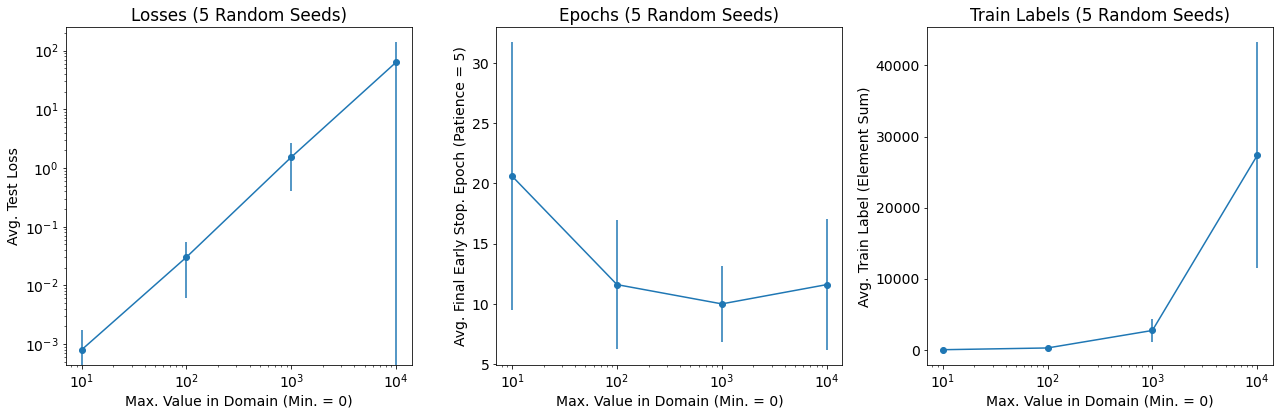

In [3]:
plt.rcParams.update({'font.size': 14})
fig, axes = plt.subplots(1, 3, figsize=(18,6))

# Remove massive outlier
filtered_results = results[results["avg_test_loss"] < 1e7]
max_values = filtered_results["train_max_value"].unique()

data = filtered_results[["train_max_value", "avg_test_loss"]]
train_loss_mean = data.groupby(by="train_max_value").mean()["avg_test_loss"]
train_loss_std = data.groupby(by="train_max_value").std()["avg_test_loss"]

axes[0].errorbar(
    max_values,
    train_loss_mean,
    yerr=train_loss_std,
    fmt='-o'
)
axes[0].set_xscale("log")
axes[0].set_yscale("log")
axes[0].set_title("Losses (5 Random Seeds)")
axes[0].set_xlabel("Max. Value in Domain (Min. = 0)")
axes[0].set_ylabel("Avg. Test Loss")

data = filtered_results[["train_max_value", "epochs"]]
epochs_mean = data.groupby(by="train_max_value").mean()["epochs"]
epochs_std = data.groupby(by="train_max_value").std()["epochs"]

axes[1].errorbar(
    max_values,
    epochs_mean,
    yerr=epochs_std,
    fmt='-o'
)
axes[1].set_xscale("log")
axes[1].set_title("Epochs (5 Random Seeds)")
axes[1].set_xlabel("Max. Value in Domain (Min. = 0)")
axes[1].set_ylabel("Avg. Final Early Stop. Epoch (Patience = 5)")

data = filtered_results[["train_max_value", "train_label_mean"]]
train_label_mean = data.groupby(by="train_max_value").mean()["train_label_mean"]

data = filtered_results[["train_max_value", "train_label_std"]]
train_label_std = data.groupby(by="train_max_value").mean()["train_label_std"]

axes[2].errorbar(
    max_values,
    train_label_mean,
    yerr=train_label_std,
    fmt='-o'
)
axes[2].set_xscale("log")
axes[2].set_title("Train Labels (5 Random Seeds)")
axes[2].set_xlabel("Max. Value in Domain (Min. = 0)")
axes[2].set_ylabel("Avg. Train Label (Element Sum)")

plt.tight_layout()
plt.show()